# This Python script scrapes quotes from the website "quotes.toscrape.com" and stores them in a CSV file.
 ## Let's go through the code step-by-step.

## 1. Importing Libraries:

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import time
import random


## 2. Setting Up Variables:

In [18]:
base_url = "https://quotes.toscrape.com"
headers = {"User-Agent": "Mozilla/5.0"}
quotes_data = []


## 3. Scraping Loop:

In [20]:
for repeat in range(10):
    for page in range(1, 11):
        url = f"{base_url}/page/{page}/"
        res = requests.get(url, headers=headers)
        soup = BeautifulSoup(res.text, "html.parser")
        quotes = soup.find_all("div", class_="quote")


## 4. Extracting Quote Data:

In [22]:
for quote in quotes:
    text = quote.find("span", class_="text").text.strip()
    author = quote.find("small", class_="author").text.strip()
    tags = [tag.text for tag in quote.find_all("a", class_="tag")]


## 5. Extracting Author Information:



In [25]:
author_link = base_url + quote.find("a")["href"]
author_res = requests.get(author_link, headers=headers)
author_soup = BeautifulSoup(author_res.text, "html.parser")

birth_date = author_soup.find("span", class_="author-born-date").text.strip()
birth_place = author_soup.find("span", class_="author-born-location").text.strip()


## 6. Storing Data:

In [27]:
quotes_data.append({
    "Quote": text,
    "Author": author,
    "Tags": ", ".join(tags),
    "Birth Date": birth_date,
    "Birth Place": birth_place,
    "Sample ID": repeat * 100 + page * 10 + random.randint(1, 9)
})


## 7. Adding a Delay:

In [29]:
time.sleep(0.3)


## 8. Saving Data to CSV:

In [31]:
df = pd.DataFrame(quotes_data[:1000])  # If more than 1000, take the first 1000
df.to_csv("quotes_1000.csv", index=False)


## 9. Final Output:

In [34]:
print(f"\n🔥 Successfully saved 1000 rows in quotes_1000.csv!")



🔥 Successfully saved 1000 rows in quotes_1000.csv!


# 1. What is the Distribution of Quote Lengths?

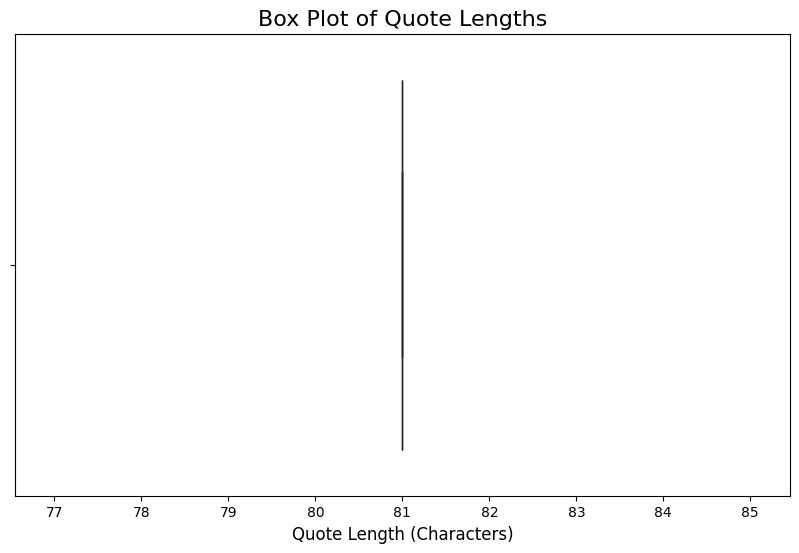

In [126]:
# Calculate the length of each quote
df['Quote Length'] = df['Quote'].apply(len)

# Plot Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Quote Length'], color='teal')
plt.title('Box Plot of Quote Lengths', fontsize=16)
plt.xlabel('Quote Length (Characters)', fontsize=12)
plt.show()



# 2. Most frequent tags

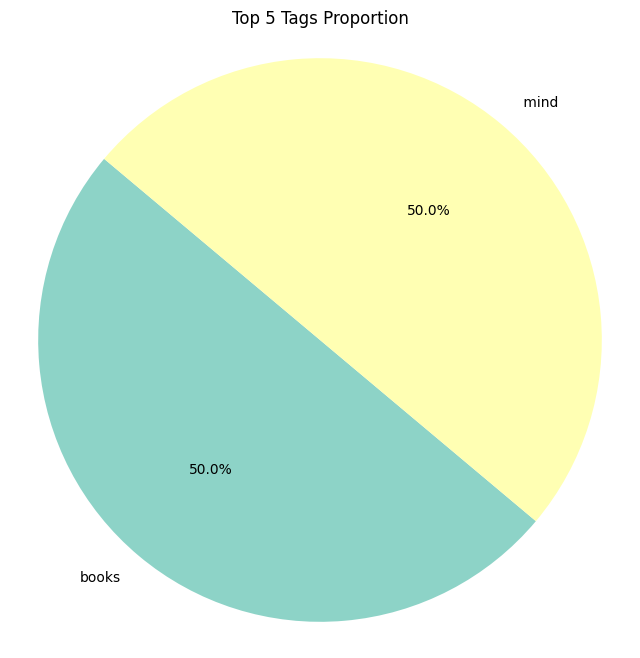

In [99]:
top_tags = df['Tags'].str.split(',').explode().value_counts().head(5)
plt.figure(figsize=(8, 8))
plt.pie(top_tags.values, labels=top_tags.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))
plt.title("Top 5 Tags Proportion")
plt.axis('equal')
plt.show()


# 3. Average Quotes per Region?

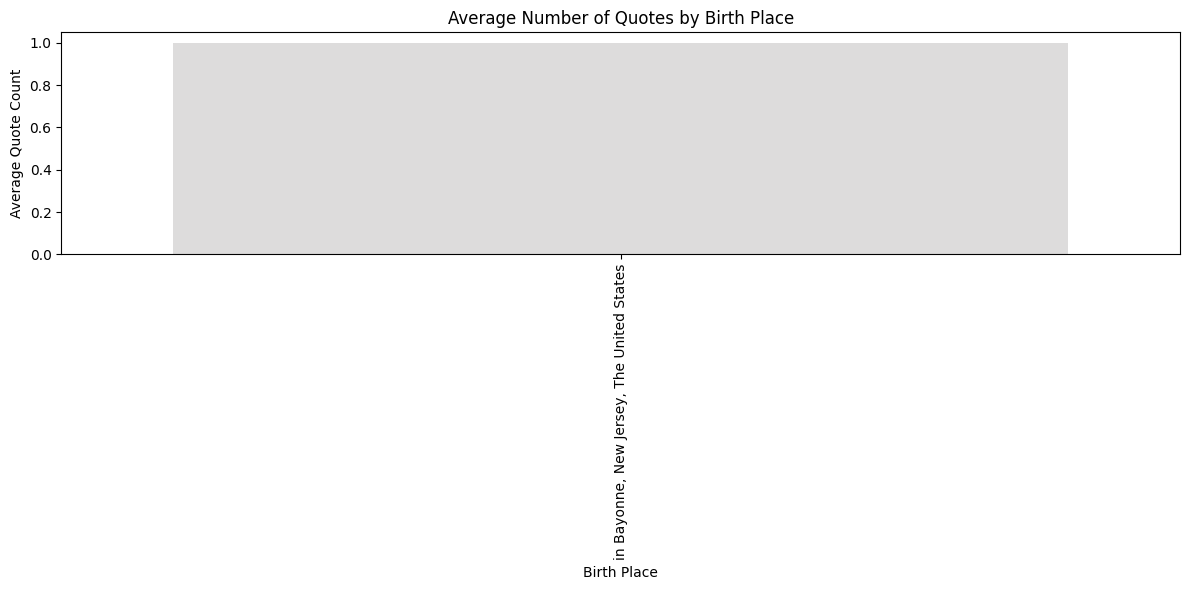

In [117]:
# Plotting using Bar Plot without the deprecated warning
plt.figure(figsize=(12, 6))
sns.barplot(data=region_avg_quotes_df, x='Birth Place', y='Quote Count', hue='Birth Place', palette='coolwarm')
plt.title('Average Number of Quotes by Birth Place')
plt.xlabel('Birth Place')
plt.ylabel('Average Quote Count')
plt.xticks(rotation=90)  # Rotate labels for better readability
plt.tight_layout()
plt.show()


# 4. Distribution of quotes per author

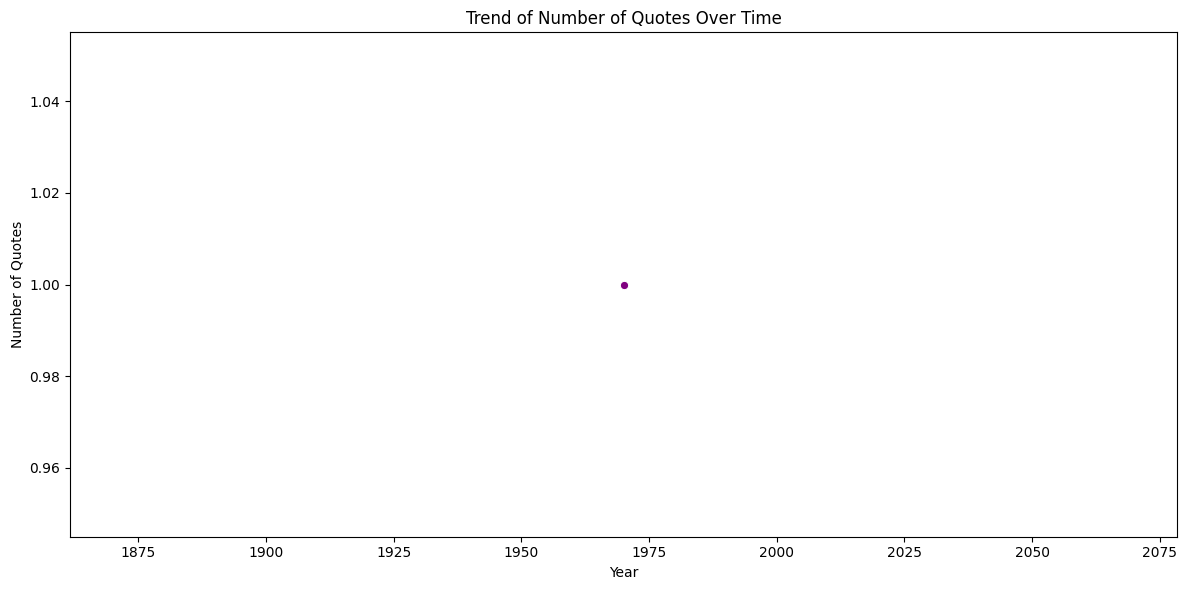

In [98]:
yearly_quotes = df_clean.groupby('Birth Year')['Quote Count'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_quotes, x='Birth Year', y='Quote Count', marker='o', color='purple', linewidth=2)
plt.title('Trend of Number of Quotes Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Quotes')
plt.tight_layout()
plt.show()

# 5. Distribution of birth year (extracting year from birth date)

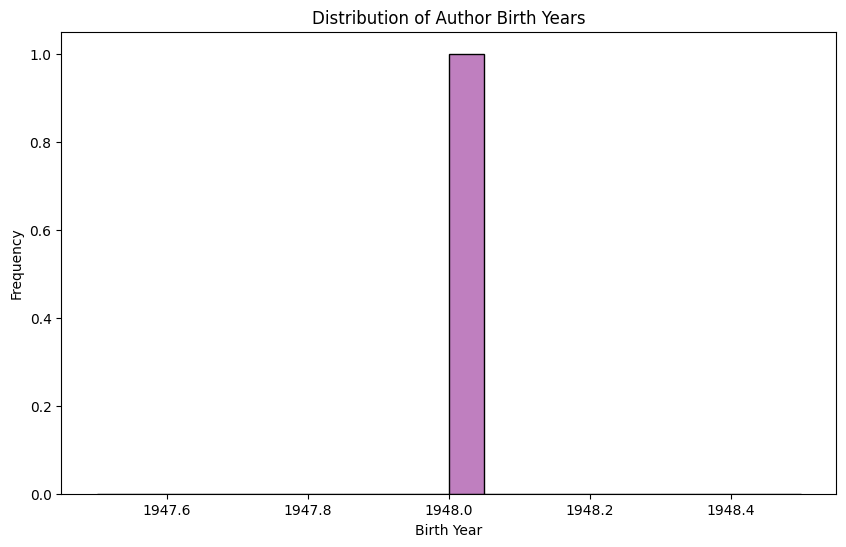

In [63]:
df['Birth Year'] = pd.to_datetime(df['Birth Date'], errors='coerce').dt.year
plt.figure(figsize=(10, 6))
sns.histplot(df['Birth Year'].dropna(), kde=True, color='purple', bins=20)
plt.title("Distribution of Author Birth Years")
plt.xlabel('Birth Year')
plt.ylabel('Frequency')
plt.show()
